In [91]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [207]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
len(X_train)

50000

In [209]:
X_train.shape

(50000, 32, 32, 3)

In [211]:
np.max(y_train)

9

In [213]:
#Standardizing the X_train and X_test:
X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [215]:
X_train.shape

(50000, 32, 32, 3)

In [217]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [219]:
y_train = y_train.reshape(-1, )

In [221]:
y_test = y_test.reshape(-1, )

In [223]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [227]:
model = keras.Sequential([
    #Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    #Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    #Dense Layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.3776 - loss: 1.7093
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.6029 - loss: 1.1350
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6498 - loss: 0.9992
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.6839 - loss: 0.9050
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7096 - loss: 0.8374
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7329 - loss: 0.7690
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7503 - loss: 0.7208
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7631 - loss: 0.6776
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7799 - loss: 0.6292
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7886 - loss: 0.6005


In [229]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6942 - loss: 0.9309


[0.9418298602104187, 0.6913999915122986]

In [231]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [241]:
y_pred[:1]

array([[4.28767031e-04, 5.64751565e-04, 4.49840492e-03, 9.73202467e-01,
        3.07929266e-04, 6.38735201e-03, 1.38879465e-02, 6.47344450e-06,
        6.59318292e-04, 5.65311711e-05]], dtype=float32)

In [247]:
np.argmax(y_pred[:1])

3

In [249]:
import matplotlib.pyplot as plt

In [259]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [253]:
y_classes = [np.argmax(element) for element in y_pred]

In [255]:
y_classes[:10]

[3, 8, 8, 0, 6, 6, 3, 6, 3, 1]

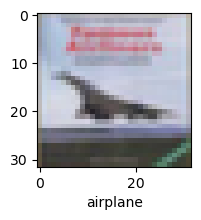

In [261]:
plot_sample(X_test, y_test, 3)